# Implementing ANN

Authors:
- Nooruddin Shaikh
- Milind Sai
- Saurabh Jejurkar
- Kartik Bhargav

In [2]:
pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.1

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow as tf

In [ ]:
data = pd.read_csv("C:\Users\adity\Desktop\Air-Quality-index-Prediction-main\Air-Quality-index-Prediction-main\Data\city_hour.csv")
data.head()

,PM2.5,NO2,CO,SO2,O3,AQI
0,83.13,28.71,6.93,49.52,59.76,209.0
1,79.84,28.68,13.85,48.49,97.07,328.0
2,94.52,32.66,24.39,67.39,111.33,514.0
3,135.99,42.08,43.48,75.23,102.70,782.0
4,178.33,35.31,54.56,55.04,107.38,914.0


In [7]:
#Splitting Data
X = data.iloc[:, :-1] #Independent features
y = data.iloc[:, -1] #Dependent feature

#Train Test Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [17]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history = NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 165,633
Trainable params: 165,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1061/1061 [==============================] - 3s 2ms/step - loss: 42.5733 - mean_absolute_error: 42.573

Epoch 43/100
1061/1061 [==============================] - 2s 2ms/step - loss: 25.0538 - mean_absolute_error: 25.0538 - val_loss: 25.1243 - val_mean_absolute_error: 25.1243
Epoch 44/100
1061/1061 [==============================] - 1s 1ms/step - loss: 25.2479 - mean_absolute_error: 25.2479 - val_loss: 24.7839 - val_mean_absolute_error: 24.7839
Epoch 45/100
1061/1061 [==============================] - 2s 1ms/step - loss: 24.5927 - mean_absolute_error: 24.5927 - val_loss: 25.7257 - val_mean_absolute_error: 25.7257
Epoch 46/100
1061/1061 [==============================] - 2s 1ms/step - loss: 24.9175 - mean_absolute_error: 24.9175 - val_loss: 24.3083 - val_mean_absolute_error: 24.3083
Epoch 47/100
1061/1061 [==============================] - 2s 1ms/step - loss: 25.1549 - mean_absolute_error: 25.1549 - val_loss: 24.7406 - val_mean_absolute_error: 24.7406
Epoch 48/100
1061/1061 [==============================] - 2s 2ms/step - loss: 24.5373 - mean_absolute_error: 24.5373 - val_loss: 24.1202 - v

1061/1061 [==============================] - 2s 2ms/step - loss: 24.3171 - mean_absolute_error: 24.3171 - val_loss: 23.8160 - val_mean_absolute_error: 23.8160
Epoch 91/100
1061/1061 [==============================] - 2s 1ms/step - loss: 24.5796 - mean_absolute_error: 24.5796 - val_loss: 23.8128 - val_mean_absolute_error: 23.8128
Epoch 92/100
1061/1061 [==============================] - 2s 2ms/step - loss: 23.7524 - mean_absolute_error: 23.7524 - val_loss: 24.3962 - val_mean_absolute_error: 24.3962
Epoch 93/100
1061/1061 [==============================] - 2s 1ms/step - loss: 23.6051 - mean_absolute_error: 23.6051 - val_loss: 24.5398 - val_mean_absolute_error: 24.5398
Epoch 94/100
1061/1061 [==============================] - 2s 2ms/step - loss: 23.8676 - mean_absolute_error: 23.8676 - val_loss: 24.1749 - val_mean_absolute_error: 24.1749
Epoch 95/100
1061/1061 [==============================] - 2s 1ms/step - loss: 24.0448 - mean_absolute_error: 24.0448 - val_loss: 23.9826 - val_mean_absol

In [18]:
prediction = NN_model.predict(X_test)

In [20]:
y_test

14349     74.0
12364    141.0
19768    111.0
8955     421.0
4563      84.0
         ...  
5416     101.0
20306    238.0
11165    166.0
17234    112.0
16172    109.0
Name: AQI, Length: 6786, dtype: float64

C:\Users\nooru\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

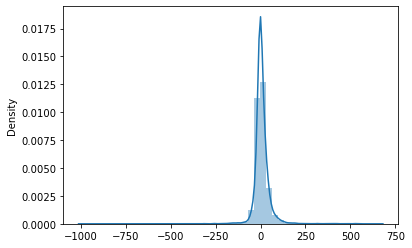

In [21]:
sns.distplot(y_test.values.reshape(-1,1)-prediction)

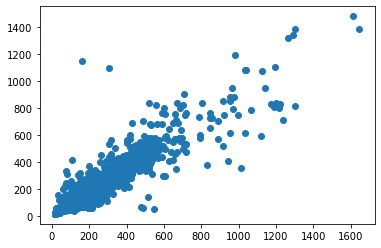

In [23]:
plt.scatter(y_test,prediction)

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 23.971634425492965
MSE: 2114.002262484325
RMSE: 45.97828033413521


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.8869935739838328

# Prediction

In [35]:
X_test.head()

,PM2.5,NO2,CO,SO2,O3
14349,38.82,26.56,0.82,10.25,20.06
12364,63.58,40.25,0.23,27.84,50.72
19768,62.33,2.60,0.59,7.46,29.58
8955,118.43,84.21,0.89,37.55,39.59
4563,37.67,37.32,1.06,7.06,34.92


In [36]:
y_test.head()

14349     74.0
12364    141.0
19768    111.0
8955     421.0
4563      84.0
Name: AQI, dtype: float64

In [34]:
print(NN_model.predict([[38.82,26.56,0.82,10.25,20.06]]))
print(NN_model.predict([[63.58,40.25,0.23,27.84,50.72]]))
print(NN_model.predict([[62.33,2.60,0.59,7.46,29.58]]))
print(NN_model.predict([[118.43,84.21,0.89,37.55,39.59]]))
print(NN_model.predict([[37.67,37.32,1.06,7.06,34.92]]))

[[87.93328]]
[[138.57399]]
[[128.83249]]
[[279.8932]]
[[88.93133]]


# Insights:
- ANN is also not giving more zccuracy than Random FOrest
- AQI 421 is predicted as 279 which tells ANN is performing bad.
- Thus we will use Random Forest as our primary model.